In [135]:
import numpy as np
import skimage.draw
import matplotlib.pyplot as plt
import math
import tcod

In [136]:
def show(img):
    plt.figure(figsize=(2,2))
    plt.imshow(img,cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

### x, y coordinates

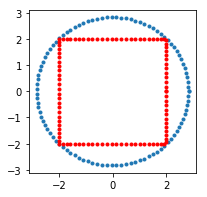

In [137]:
w = 4
h = 4
angle = np.linspace(0, 2 * math.pi, 100)

# circle coordinates
r_circle = np.sqrt((w/2)**2 + (h/2)**2)
x = np.round(np.cos(angle)*r_circle, 2)
y = np.round(np.sin(angle)*r_circle, 2)

# plot outer circle
plt.figure(figsize=(3,3))
plt.plot(x, y, '.')

# rect coordinates
x[x > w/2] = w/2
x[x < -w/2] = -w/2
y[y > h/2] = h/2
y[y < -h/2] = -h/2

# plot inner rectangle
plt.plot(x, y, '.r')
plt.show()

### Drawing circle badly

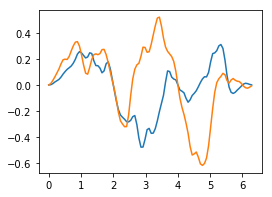

In [138]:
# noise for x coordinate
noise1 = tcod.noise.Noise(
    dimensions=1,
    algorithm=tcod.NOISE_SIMPLEX,
    implementation=tcod.noise.FBM,
    hurst=0.5,
    lacunarity=2,
    octaves=4,
)

# noise for y coordinate
noise2 = tcod.noise.Noise(
    dimensions=1,
    algorithm=tcod.NOISE_SIMPLEX,
    implementation=tcod.noise.FBM,
    hurst=0.5,
    lacunarity=2,
    octaves=4,
)

# Return the sampled noise from this grid of points.
xn = noise1.sample_ogrid([angle])
yn = noise2.sample_ogrid([angle])

# start and end return to zero
xn[:20] = xn[:20] * np.arange(0, 1, 0.05)
xn[-20:] = xn[-20:] * np.arange(1, 0, -0.05)
yn[:20] = yn[:20] * np.arange(0, 1, 0.05)
yn[-20:] = yn[-20:] * np.arange(1, 0, -0.05)

# plot noise
plt.figure(figsize=(4,3))
plt.plot(angle,xn)
plt.plot(angle,yn)
plt.show()

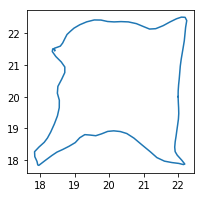

In [139]:
plt.figure(figsize=(3,3))
plt.plot(x+ x*xn*0.75+20, y+y*yn*0.75+20)
plt.show()

### Floor

In [140]:
# bringing this all together 

w=10
h=10
angle = np.linspace(0, 2 * math.pi, 100)

# circle coordinates
r_circle = np.sqrt((w/2)**2 + (h/2)**2)
x = np.round(np.cos(angle)*r_circle, 2)
y = np.round(np.sin(angle)*r_circle, 2)

# rectangle coordinates
x[x > w/2] = w/2
x[x < -w/2] = -w/2
y[y > h/2] = h/2
y[y < -h/2] = -h/2

# noise for x coordinate
noise1 = tcod.noise.Noise(
    dimensions=1,
    algorithm=tcod.NOISE_SIMPLEX,
    implementation=tcod.noise.FBM,
    hurst=0.5,
    lacunarity=2,
    octaves=4,
)

# noise for y coordinate
noise2 = tcod.noise.Noise(
    dimensions=1,
    algorithm=tcod.NOISE_SIMPLEX,
    implementation=tcod.noise.FBM,
    hurst=0.5,
    lacunarity=2,
    octaves=4,
)

# Return the sampled noise from the grid of points.
xn = noise1.sample_ogrid([angle])
yn = noise2.sample_ogrid([angle])

# start and end return to zero
xn[:20] = xn[:20] * np.arange(0, 1, 0.05)
xn[-20:] = xn[-20:] * np.arange(1, 0, -0.05)
yn[:20] = yn[:20] * np.arange(0, 1, 0.05)
yn[-20:] = yn[-20:] * np.arange(1, 0, -0.05)

# add noise 
x = x + x * xn #* 0.75
y = y + y * yn #* 0.75

# move origin point
x = x - min(x) + 4
y = y - min(y) + 4

# update width and height
w = int(max(x) + 6)
h = int(max(y) + 6)

# draw to numpy array
img = np.zeros((h, w), dtype=np.uint8)
rr, cc = skimage.draw.polygon(y, x)
img[rr, cc] = 100

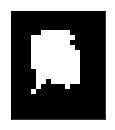

In [141]:
floor = img[1:-1, 1:-1]
show(floor)

### Wall

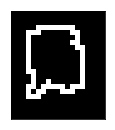

In [142]:
# move picture in all direction, use the mask as the wall

nw_roof = img[1:-1, 1:-1] < img[2:, 2:]
ne_roof = img[1:-1, 1:-1] < img[2:, :-2]
sw_roof = img[1:-1, 1:-1] < img[:-2, 2:]
se_roof = img[1:-1, 1:-1] < img[:-2, :-2]
n_roof = img[1:-1, 1:-1] < img[2:, 1:-1]
s_roof = img[1:-1, 1:-1] < img[:-2, 1:-1]
w_roof = img[1:-1, 1:-1] < img[1:-1, 2:]
e_roof = img[1:-1, 1:-1] < img[1:-1, :-2]


roof_wall1 = (
    nw_roof + ne_roof + sw_roof + se_roof + 
    n_roof + e_roof + s_roof + w_roof
)
show(roof_wall1)

### 3D Wall

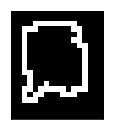

In [143]:
# same but zoomed in. need more space to move in north and south direction.

floor = img[2:-2, 2:-2]
nw_roof = floor < img[3:-1, 3:-1]
ne_roof = floor < img[3:-1, 1:-3]
sw_roof = floor < img[1:-3, 3:-1]
se_roof = floor < img[1:-3, 1:-3]
n_roof = floor < img[3:-1, 2:-2]
s_roof = floor < img[1:-3, 2:-2]
w_roof = floor < img[2:-2, 3:-1]
e_roof = floor < img[2:-2, 1:-3]

roof_wall1 = (
    nw_roof + ne_roof + sw_roof + se_roof + 
    n_roof + e_roof + s_roof + w_roof
)
show(roof_wall1)

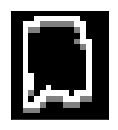

In [144]:
# to create 3d effect, move picture north and south by 2

floor = img[2:-2, 2:-2]
lnw_roof = floor < img[4:, 3:-1]
lne_roof = floor < img[4:, 1:-3]
lsw_roof = floor < img[:-4, 3:-1]
lse_roof = floor < img[:-4, 1:-3]
ln_roof = floor < img[4:, 2:-2]
ls_roof = floor < img[:-4, 2:-2]
w_roof = floor < img[2:-2, 3:-1]
e_roof = floor < img[2:-2, 1:-3]

roof_wall2 = (
    lnw_roof + lne_roof + lsw_roof + lse_roof + 
    ln_roof + ls_roof + roof_wall1
)
final = roof_wall2[:-1] << roof_wall2[1:]
show(final)

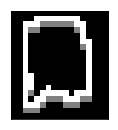

In [145]:
#remove wall with no roof
wall_with_no_roof = (final == 1)[1:-1,1:-1] & (final == 0)[0:-2,1:-1]
final[1:-1,1:-1][wall_with_no_roof] = 0
show(final)

In [146]:
# everything in a function

def irregular_shape(w=10, h=10):
    angle = np.linspace(0, 2 * math.pi, 100)

    # circle coordinates
    r_circle = np.sqrt((w/2)**2 + (h/2)**2)
    x = np.round(np.cos(angle)*r_circle, 2)
    y = np.round(np.sin(angle)*r_circle, 2)

    # rectangle coordinates
    x[x > w/2] = w/2
    x[x < -w/2] = -w/2
    y[y > h/2] = h/2
    y[y < -h/2] = -h/2
    
    # noise for x coordinate
    noise1 = tcod.noise.Noise(
        dimensions=1,
        algorithm=tcod.NOISE_SIMPLEX,
        implementation=tcod.noise.FBM,
        hurst=0.5,
        lacunarity=2,
        octaves=4,
    )
    
    # noise for y coordinate
    noise2 = tcod.noise.Noise(
        dimensions=1,
        algorithm=tcod.NOISE_SIMPLEX,
        implementation=tcod.noise.FBM,
        hurst=0.5,
        lacunarity=2,
        octaves=4,
    )

    # Return the sampled noise from the grid of points.
    xn = noise1.sample_ogrid([angle])
    yn = noise2.sample_ogrid([angle])

    # start and end return to zero
    xn[:20] = xn[:20] * np.arange(0, 1, 0.05)
    xn[-20:] = xn[-20:] * np.arange(1, 0, -0.05)
    yn[:20] = yn[:20] * np.arange(0, 1, 0.05)
    yn[-20:] = yn[-20:] * np.arange(1, 0, -0.05)

    # add noise 
    x = x + x * xn
    y = y + y * yn

    # move origin point
    x = x - min(x) + 3
    y = y - min(y) + 4
    
    # update width, height
    w = int(max(x) + 5)
    h = int(max(y) + 7)
    
    # draw to numpy array
    img = np.zeros((h, w), dtype=np.uint8)
    rr, cc = skimage.draw.polygon(y, x)
    img[rr, cc] = 100
    
    # move picture in all direction, use the mask as the wall
    floor = img[2:-2, 2:-2]
    nw_roof = floor < img[3:-1, 3:-1]
    ne_roof = floor < img[3:-1, 1:-3]
    sw_roof = floor < img[1:-3, 3:-1]
    se_roof = floor < img[1:-3, 1:-3]
    n_roof = floor < img[3:-1, 2:-2]
    s_roof = floor < img[1:-3, 2:-2]
    w_roof = floor < img[2:-2, 3:-1]
    e_roof = floor < img[2:-2, 1:-3]

    roof_wall1 = (
        nw_roof + ne_roof + sw_roof + se_roof + 
        n_roof + e_roof + s_roof + w_roof
    )
    
    # to create the 3d effect, move picture north and south by 2
    floor = img[2:-2, 2:-2]
    lnw_roof = floor < img[4:, 3:-1]
    lne_roof = floor < img[4:, 1:-3]
    lsw_roof = floor < img[:-4, 3:-1]
    lse_roof = floor < img[:-4, 1:-3]
    ln_roof = floor < img[4:, 2:-2]
    ls_roof = floor < img[:-4, 2:-2]
    w_roof = floor < img[2:-2, 3:-1]
    e_roof = floor < img[2:-2, 1:-3]

    roof_wall2 = (
        lnw_roof + lne_roof + lsw_roof + lse_roof + 
        ln_roof + ls_roof + roof_wall1
    )
    
    # create wall and roof
    final = roof_wall2[:-1] << roof_wall2[1:]
    
    # remove wall with no roof
    wall_with_no_roof = (final == 1)[1:-1,1:-1] & (final == 0)[0:-2,1:-1]
    final[1:-1,1:-1][wall_with_no_roof] = 0
    
    return final


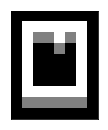

In [147]:
a = irregular_shape(4,4)
show(a)

In [148]:
a

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 2, 2, 2, 2, 2, 0],
       [0, 2, 1, 1, 2, 1, 2, 0],
       [0, 2, 0, 0, 1, 0, 2, 0],
       [0, 2, 0, 0, 0, 0, 2, 0],
       [0, 2, 0, 0, 0, 0, 2, 0],
       [0, 2, 0, 0, 0, 0, 2, 0],
       [0, 2, 2, 2, 2, 2, 2, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]], dtype=int8)

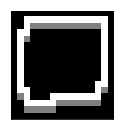

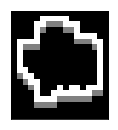

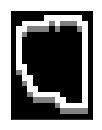

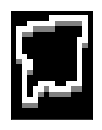

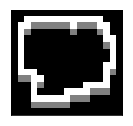

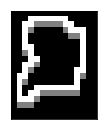

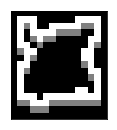

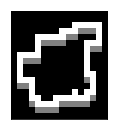

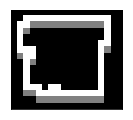

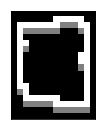

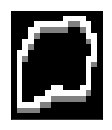

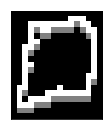

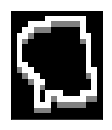

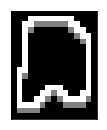

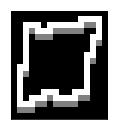

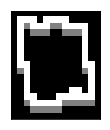

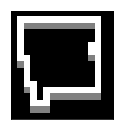

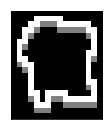

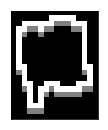

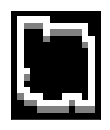

In [149]:
for i in range(20):
    show(irregular_shape(10,10))